# 과제 1: 회귀 분석

목표: 특정 변수에 대한 선형 회귀 모델을 구축하고 평하갑니다.

데이터셋: California Housing dataset을 사용합니다.

내용:
1. 데이터를 불러오고, 독립 변수(X)와 종속 변수(y)를 설정합니다.
2. 훈련 데이터와 테스트 데이터로 분할합니다.
3. 선형 회귀 모델을 학습시키고, 테스트 데이터에 대해 예측합니다.
4. 예측 결과를 평가하고, MSE와 $R^2$ 점수를 계산합니다.
5. 실제 값과 예측 값을 시각화합니다.

In [16]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 로드 및 분할
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습 및 예측
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")

MSE: 0.5559
R2: 0.5758


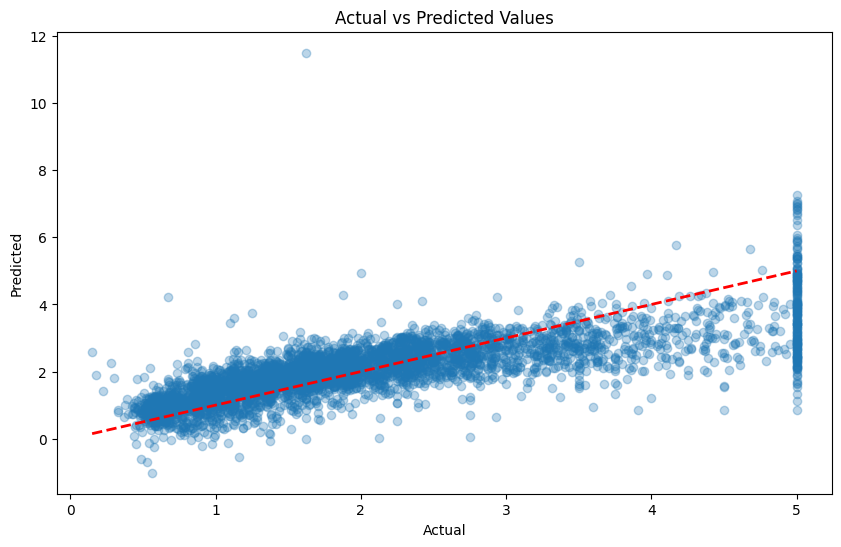

In [17]:
import matplotlib.pyplot as plt

# 실제값과 예측값 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values")
plt.show()

# 과제 2: 분류 분석

목표: 특정 데이터에 대한 나이브 베이즈 분류 모델을 구축하고 평가합니다.

데이터셋: Wind dataset을 사용합니다.

내용:
1. 데이터를 불러오고, 독립 변수(X)와 종속 변수(y)를 설정합니다.
2. 훈련 데이터와 테스트 데이터로 분할합니다.
3. 나이브 베이즈 모델을 학습시키고, 테스트 데이터에 대해 예측합니다.
4. 예측 결과를 평가하고, 정확도와 혼동 행렬을 계산합니다.
5. 혼동 행렬을 시각화합니다.

In [27]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# 데이터 로드 및 분할
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습 및 예측
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 평가
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(confusion)

Accuracy: 1.0000
Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


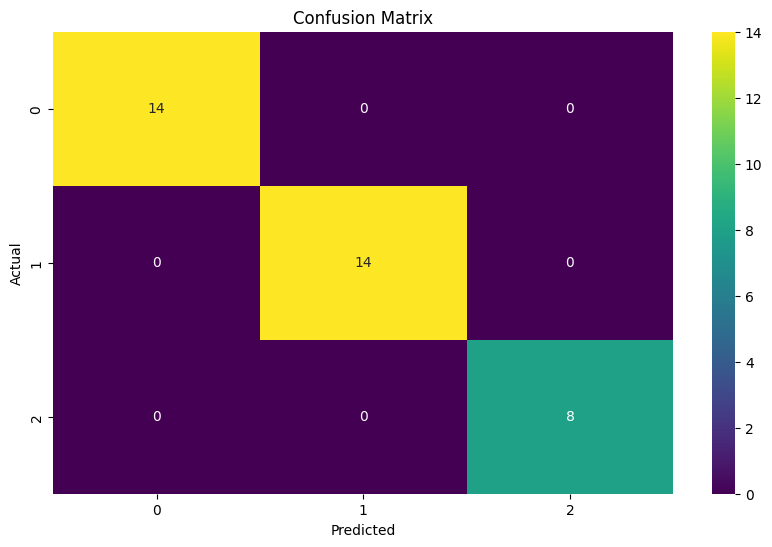

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# 혼동 행렬 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 과제 3: 교차 검증

목표: 데이터에 대해 교차 검증을 수행하며 모델 성능을 평가합니다.

데이터셋: Diabetes dataset을 사용합니다.

내용:
1. 데이터를 불러오고, 독립 변수(X)와 종속 변수(y)를 설정합니다.
2. 나이브 베이즈 모델을 사용하여 5-겹 교차 검증을 수행합니다.
3. 교차 검증 점수를 출력하고 평균 점수를 계산합니다.
4. 교차 검증 결과를 시각화합니다.

In [37]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error

# 데이터 로드
X, y = load_diabetes(return_X_y=True)

# 모델 생성
model = LinearRegression()

# MSE를 기반으로 한 교차 검증 점수 계산
mse_scorer = make_scorer(mean_squared_error)
scores = cross_val_score(model, X, y, cv=5, scoring=mse_scorer)

print(f"Cross-validation MSE scores: {scores}")
print(f"Mean MSE: {scores.mean():.4f}")
print(f"Standard deviation: {scores.std():.4f}")

Cross-validation MSE scores: [2779.92344921 3028.83633883 3237.6875877  3008.74648884 2910.21268776]
Mean MSE: 2993.0813
Standard deviation: 150.7710


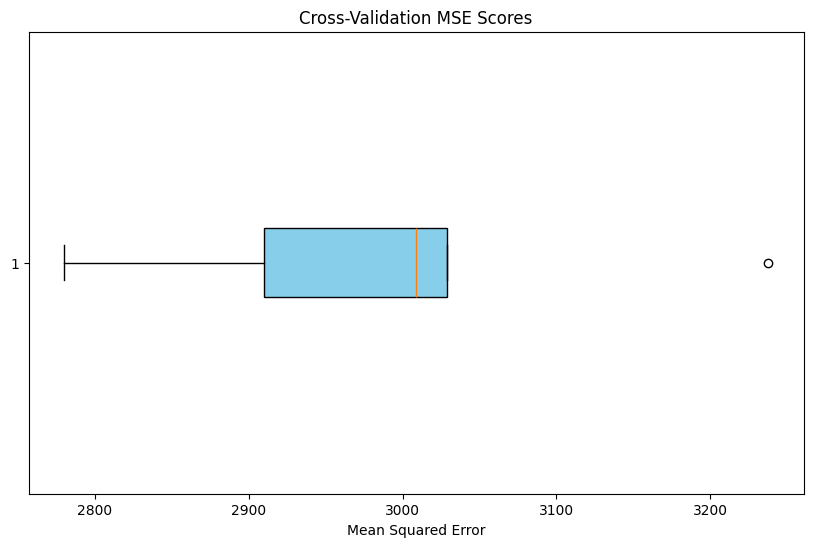

In [40]:
# 교차 검증 결과 시각화
plt.figure(figsize=(10, 6))
plt.boxplot(scores, vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.xlabel('Mean Squared Error')
plt.title('Cross-Validation MSE Scores')
plt.show()